# Alucar analisando as vendas

In [58]:
# !pip install pandas

In [59]:
import pandas as pd

In [60]:
alucar = pd.read_csv(r'C:\Users\walas\OneDrive\Área de Trabalho\Cursos DataScience\Curso 7\dados\material+curso+-+Time+Series\material curso - Time Series\alucar.csv')

In [61]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [62]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [63]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [64]:
alucar.mes = pd.to_datetime(alucar.mes)

In [65]:
alucar.mes.head()

0   2017-01-31
1   2017-02-28
2   2017-03-31
3   2017-04-30
4   2017-05-31
Name: mes, dtype: datetime64[ns]

In [66]:
!pip install matplotlib
!pip install seaborn

In [67]:
# import seaborn as sns
# %matplotlib inline
# import matplotlib.pyplot as plt

In [68]:
sns.__version__

'0.11.2'

<AxesSubplot:xlabel='mes', ylabel='vendas'>

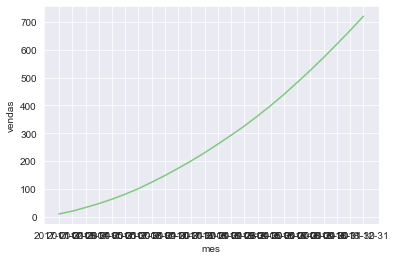

In [69]:
sns.lineplot(data=dados, x='mes', y='vendas')

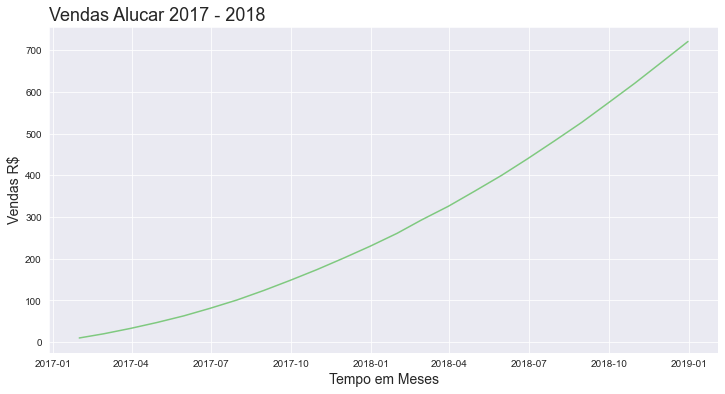

In [70]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
graph = sns.lineplot(data=alucar, x='mes', y='vendas')
graph.figure.set_size_inches(12,6)
graph.set_title('Vendas Alucar 2017 - 2018', loc='left', fontsize=18)
graph.set_xlabel('Tempo em Meses', fontsize=14)
graph.set_ylabel('Vendas R$', fontsize=14)
graph = graph

In [71]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [72]:
alucar['aumento'] = alucar.vendas.diff()

In [73]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


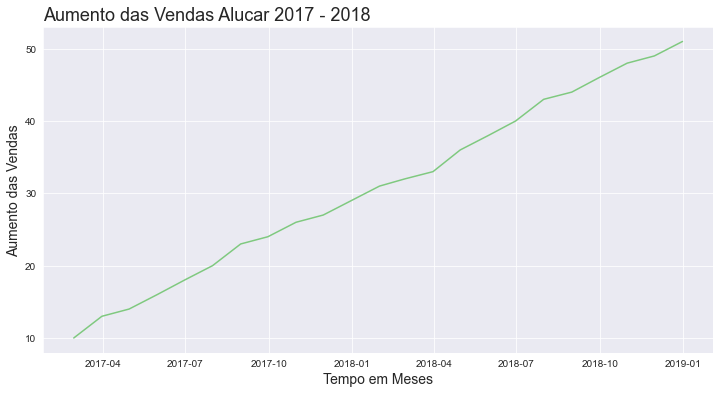

In [75]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
graph = sns.lineplot(data=alucar, x='mes', y='aumento')
graph.figure.set_size_inches(12,6)
graph.set_title('Aumento das Vendas Alucar 2017 - 2018', loc='left', fontsize=18)
graph.set_xlabel('Tempo em Meses', fontsize=14)
graph.set_ylabel('Aumento das Vendas', fontsize=14)
graph = graph

In [76]:
def plotar (titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

In [77]:
alucar['aceleracao'] = alucar.aumento.diff()

In [78]:
alucar.aceleracao.head()

0    NaN
1    NaN
2    3.0
3    1.0
4    2.0
Name: aceleracao, dtype: float64

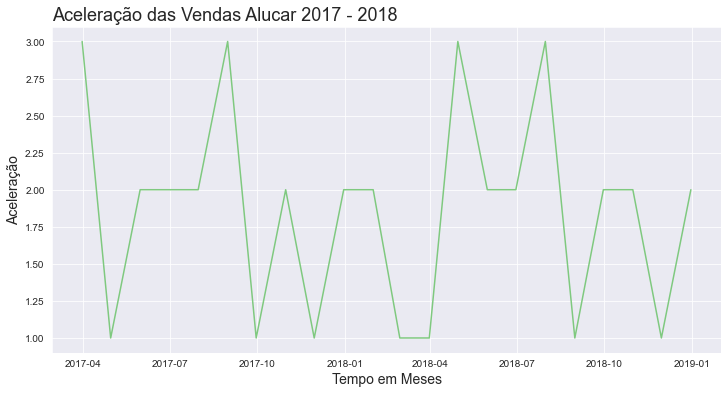

In [79]:
plotar('Aceleração das Vendas Alucar 2017 - 2018', 'Tempo em Meses', 'Aceleração', 'mes', 'aceleracao', alucar)

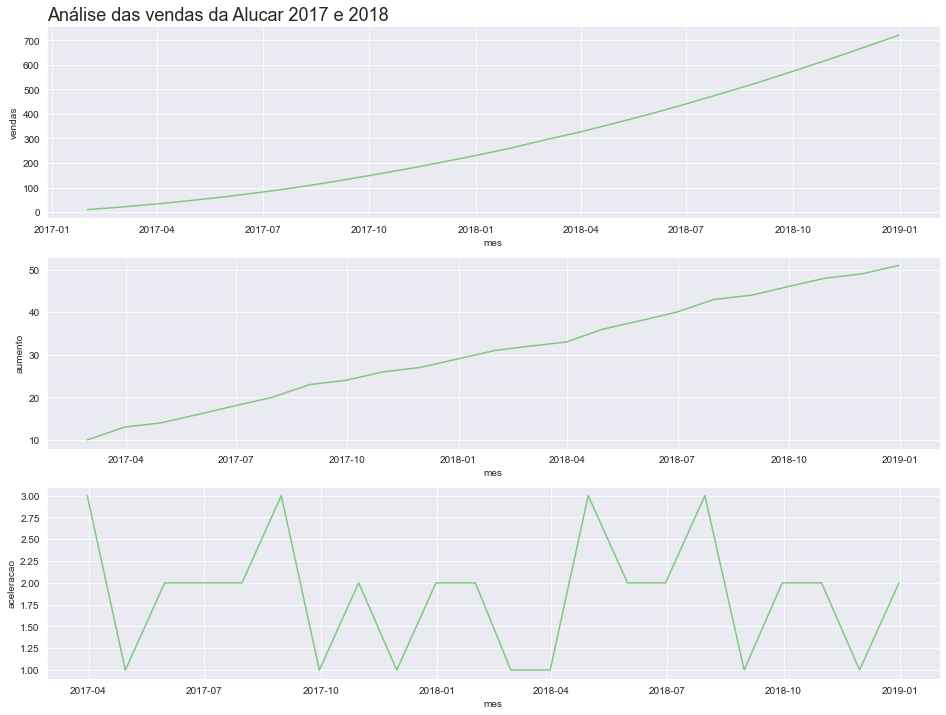

In [80]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise das vendas da Alucar 2017 e 2018',fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [81]:
from pandas.plotting import autocorrelation_plot

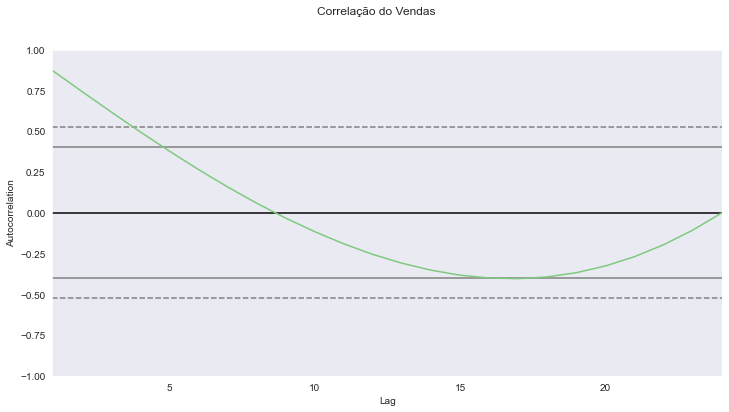

In [83]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Vendas')
autocorrelation_plot(alucar['vendas'])
ax=ax

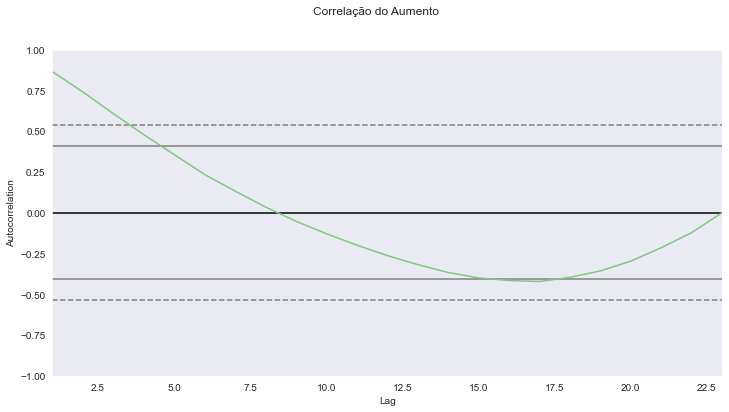

In [84]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do Aumento')
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

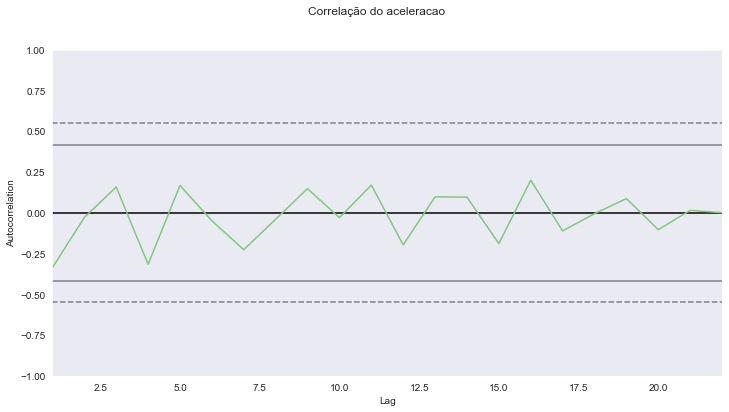

In [85]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aceleracao')
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax